In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data = pd.read_excel('Data\T_tests_on_GunRegulations.xlsx', sheet_name='Data', header=0)

In [29]:
# Running T-test on Murders and Firearms registration requirement

from scipy import stats

data_subset = data.iloc[:51]

group1 = data_subset[data_subset['Firearm registration required'] == 0]['Murders by firearms, per 100,000']
group2 = data_subset[data_subset['Firearm registration required'] == 1]['Murders by firearms, per 100,000']

# Ensure the murder rate columns are numeric and drop NaNs:
group1 = pd.to_numeric(group1, errors='coerce').dropna()
group2 = pd.to_numeric(group2, errors='coerce').dropna()

In [32]:
# Perform the t-test:

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.573320174285368, P-value: 0.023200630843208263


In [47]:
# Running T-test on Murders and Permit required to purchase:

data_subset = data.iloc[:51]

group3 = data_subset[data_subset['Permit required to purchase'] == 0]['Murders by firearms, per 100,000 (3)']
group4 = data_subset[data_subset['Permit required to purchase'] == 1]['Murders by firearms, per 100,000 (3)']

group3 = pd.to_numeric(group3, errors='coerce').dropna()
group4 = pd.to_numeric(group4, errors='coerce').dropna()

In [34]:
t_stat, p_value = stats.ttest_ind(group3, group4, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.758520023354469, P-value: 0.000591164538687807


In [7]:
# Importing Poverty to do Correlation with Homicides:
df_poverty = pd.read_excel('Data\Poverty_in_US_2022_by_state.xlsx', sheet_name='Data', header=0)
df_poverty.set_index('State', inplace=True)
df_poverty.head()

,Poverty Rate,"Murders by firearms, per 100,000"
State,,
Alabama,14.8,5.739645
Alaska,11.5,1.369863
Arizona,12.1,1.616848
Arkansas,15.9,8.305648
California,11.4,0.156290


In [100]:
# Calculate the correlation
correlation = df_poverty['Murders by firearms, per 100,000'].corr(df_poverty['Poverty Rate'])

print("Correlation between poverty and Murders by firearms, per 100,000:", correlation)

Correlation between poverty and Murders by firearms, per 100,000: 0.5163636215891599


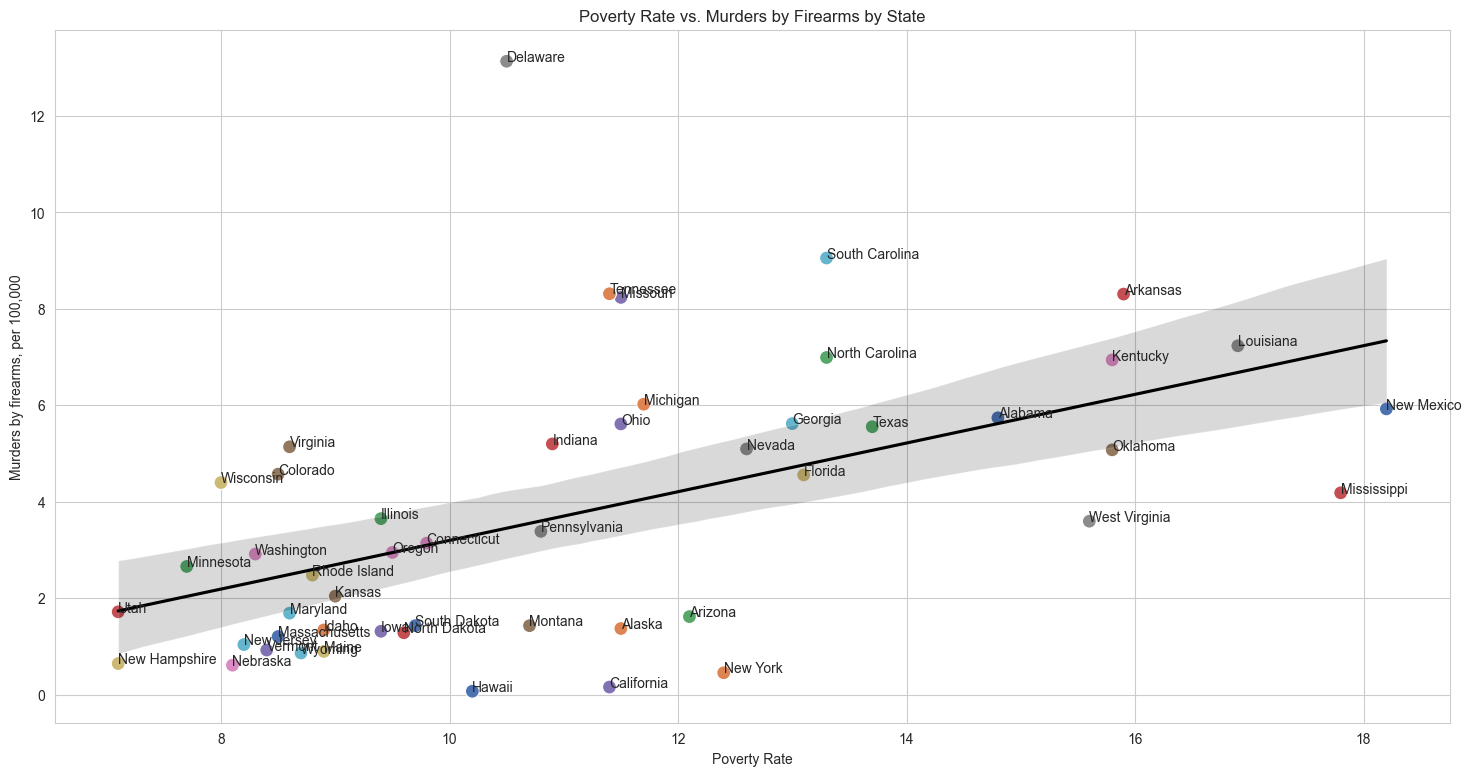

In [129]:
# Creating scatterplot for poverty and homicides

import seaborn as sns

plt.figure(figsize=(18, 9))
scatter_plot = sns.scatterplot(data=df_poverty, x='Poverty Rate', y='Murders by firearms, per 100,000',
                               hue='State', palette='deep', s=100)


plt.title('Poverty Rate vs. Murders by Firearms by State')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Murders by Firearms (per 100,000)')

for i, txt in enumerate(df_poverty.index):
    plt.annotate(txt, (df_poverty['Poverty Rate'][i], df_poverty['Murders by firearms, per 100,000'][i]))

trendline = sns.regplot(data=df_poverty, x='Poverty Rate', y='Murders by firearms, per 100,000',
                        scatter=False, color='black')

plt.legend().remove()
plt.show()

In [5]:
# Importing N of Registered weapons to do Correlation with Homicides:
df_registered = pd.read_excel('Data/Number_registered_weapons_2021_by_state.xlsx', sheet_name='Data', header=0)
df_registered.set_index('State', inplace=True)
df_registered.head()

,"Number of registered weapons, 2021","Murders by firearms, per 100,000"
State,,
Alabama,194920,5.739645
Alaska,28237,1.369863
Arizona,258691,1.616848
Arkansas,133981,8.305648
California,406360,0.156290


In [6]:
# Calculate the correlation
correlation = df_registered['Murders by firearms, per 100,000'].corr(df_registered['Number of registered weapons, 2021'])

print("Correlation between number of registered weapons and Murders by firearms, per 100,000:", correlation)

Correlation between number of registered weapons and Murders by firearms, per 100,000: 0.1739634724591314


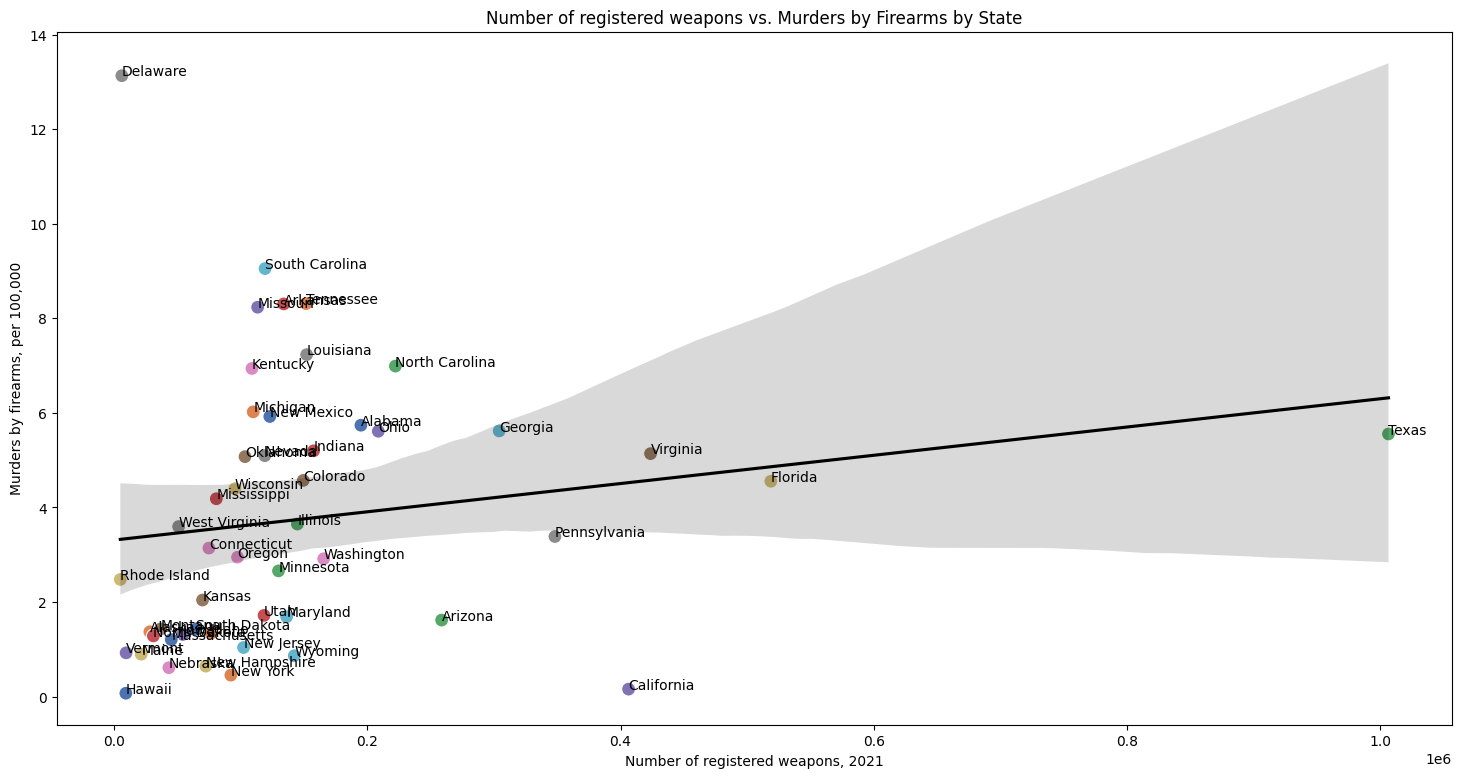

In [11]:
import seaborn as sns

plt.figure(figsize=(18, 9))
scatter_plot = sns.scatterplot(data=df_registered, x='Number of registered weapons, 2021', y='Murders by firearms, per 100,000',
                               hue='State', palette='deep', s=100)


plt.title('Number of registered weapons vs. Murders by Firearms by State')
plt.xlabel('Number of registered weapons, 2021 (%)')
plt.ylabel('Murders by Firearms (per 100,000)')

for i, txt in enumerate(df_registered.index):
    plt.annotate(txt, (df_registered['Number of registered weapons, 2021'][i], df_registered['Murders by firearms, per 100,000'][i]))


trendline = sns.regplot(data=df_registered, x='Number of registered weapons, 2021', y='Murders by firearms, per 100,000',
                         scatter=False, color='black')

plt.legend().remove()
plt.show()

In [130]:
data_oecd = pd.read_excel('Data/OECD_Homicides.xlsx', sheet_name='Sheet1', header=0)
data_oecd.head()

,Country,Homicides per 100000 people
0,Mexico,18.90
1,Turkey,4.35
2,Estonia,4.08
3,USA,3.82
4,Chile,3.14


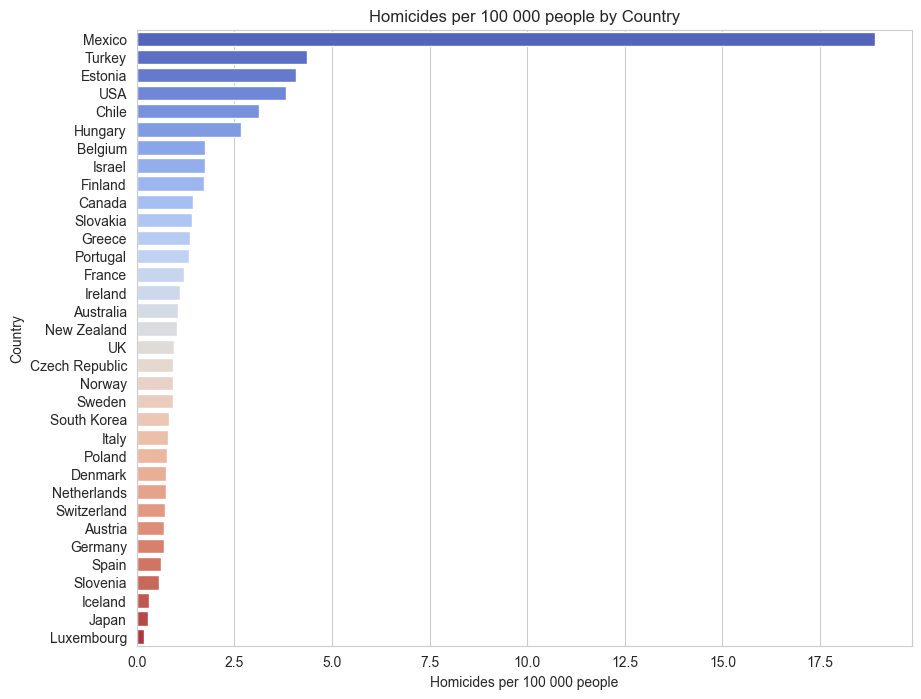

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_oecd = pd.read_excel('Data\OECD_Homicides.xlsx', sheet_name='Sheet1', header=0)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Homicides per 100000 people', y='Country', data=data_oecd, palette='coolwarm')
plt.title('Homicides per 100 000 people by Country')
plt.xlabel('Homicides per 100 000 people')
plt.show()

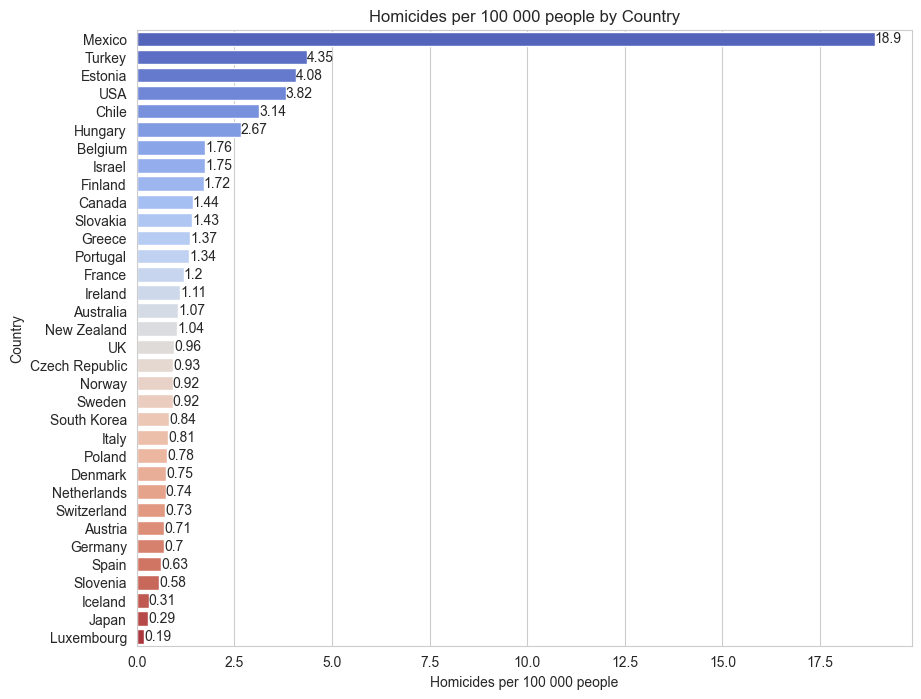

In [20]:
# OECD HOMICIDES 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_oecd = pd.read_excel('Data\OECD_Homicides.xlsx', sheet_name='Sheet1', header=0)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Homicides per 100000 people', y='Country', data=data_oecd, palette='coolwarm')

for index, value in enumerate(data_oecd['Homicides per 100000 people']):
    plt.text(value, index, f'{value}', va='center')

plt.title('Homicides per 100 000 people by Country')
plt.xlabel('Homicides per 100 000 people')
plt.show()

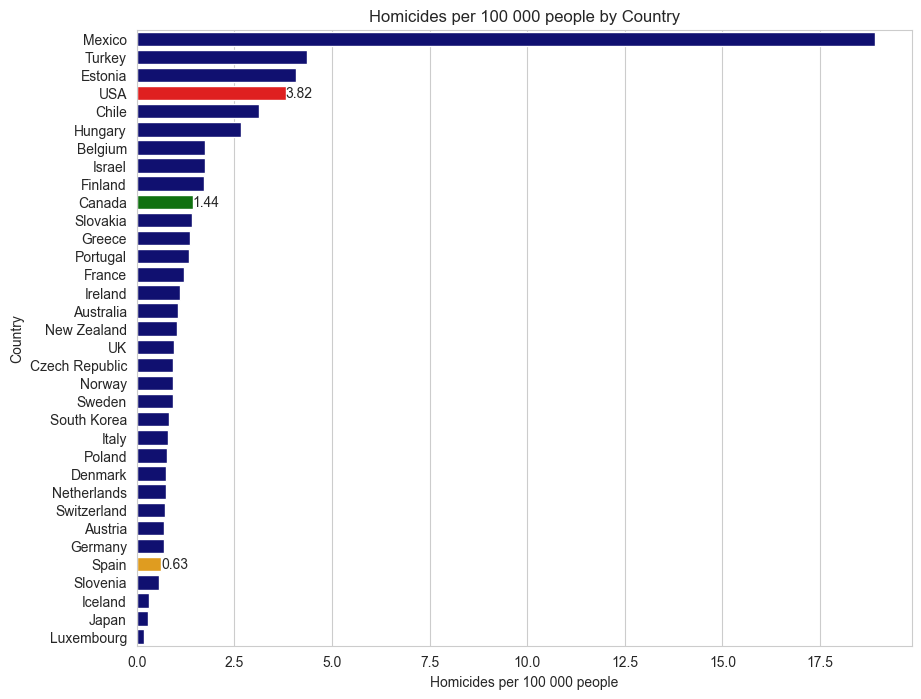

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Data\OECD_Homicides.xlsx', sheet_name='Sheet1')

df['Color'] = df['Country'].apply(lambda x: 'USA' if x == 'USA' else ('Canada' if x == 'Canada' else ('Spain' if x == 'Spain' else 'Other')))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Homicides per 100000 people', y='Country', hue='Color', 
                      dodge=False, palette={'USA': 'red', 'Canada': 'green', 'Spain': 'orange', 'Other': 'navy'}, data=df)


countries_to_label = ['USA', 'Canada', 'Spain']
for i, row in df.iterrows():
    if row['Country'] in countries_to_label:
        text_position = i  
        value = row['Homicides per 100000 people']
        plt.text(value, text_position, f'{value:.2f}', va='center')

barplot.get_legend().remove()

plt.title('Homicides per 100 000 people by Country')
plt.xlabel('Homicides per 100 000 people')
plt.show()

In [140]:
df_US_Can = pd.read_excel('Data\Homicide_rates_US_Canada.xlsx', sheet_name='Sheet1', header=0)
df_US_Can.head()

,Year,Homicides per 100K in Canada,Homicides per 100K in USA
0,2000,1.78,5.52
1,2001,1.79,6.67
2,2002,1.86,5.63
3,2003,1.74,5.71
4,2004,1.96,5.79


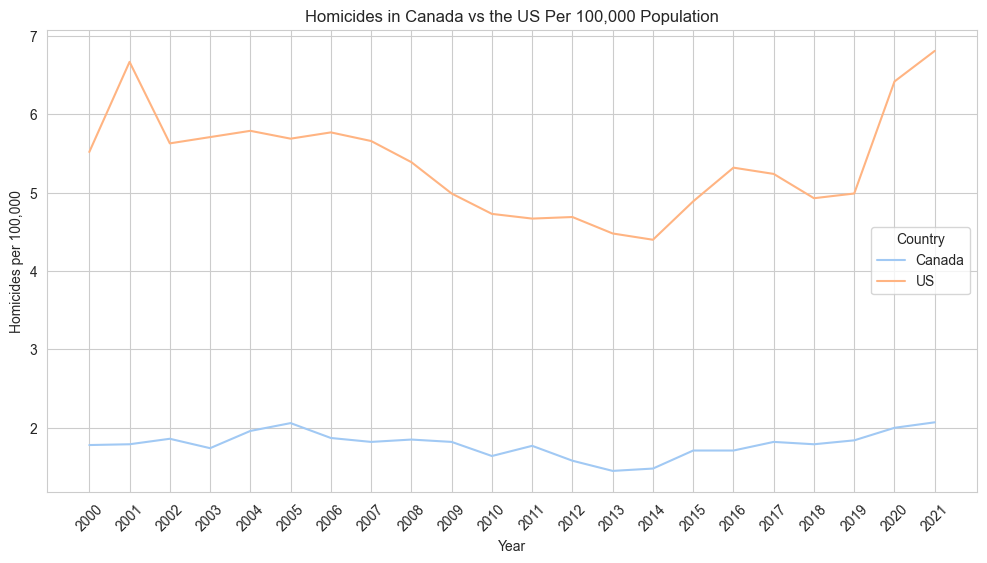

In [143]:
plt.figure(figsize=(12, 6))  
sns.set_style('whitegrid') 
sns.lineplot(data=df_US_Can, x='Year', y='Homicides per 100K in Canada', label='Canada') 
sns.lineplot(data=df_US_Can, x='Year', y='Homicides per 100K in USA', label='US') 

plt.xticks(df_US_Can['Year'].unique(), rotation=90) 
plt.title('Homicides in Canada vs the US Per 100,000 Population')
plt.ylabel('Homicides per 100,000')
plt.xlabel('Year')
plt.legend(title='Country')
plt.xticks(rotation=45) 
plt.show() 

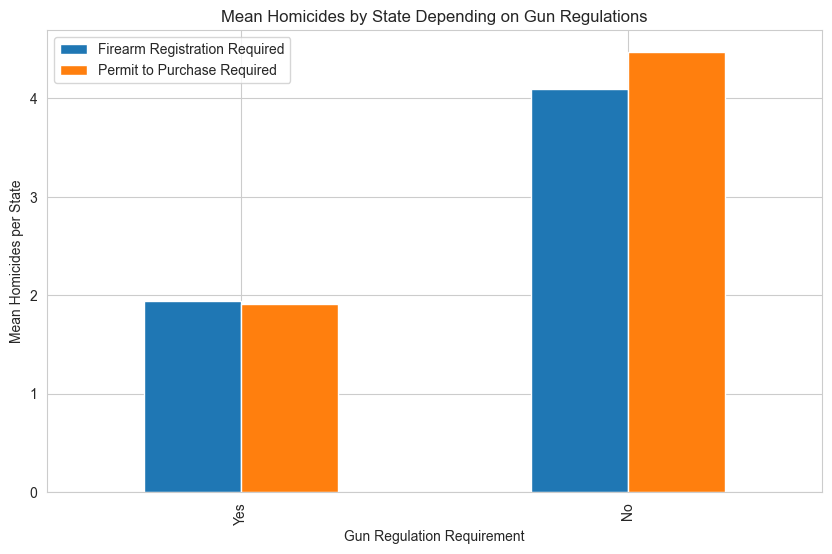

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Regulation': ['Yes', 'No'],
    'Firearm Registration Required': [1.94, 4.1],
    'Permit to Purchase Required': [1.91, 4.47]}

df_gun_regulations = pd.DataFrame(data)
df_gun_regulations.set_index('Regulation', inplace=True)
df_gun_regulations.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Homicides by State Depending on Gun Regulations')
plt.xlabel('Gun Regulation Requirement')
plt.ylabel('Mean Homicides per State')

plt.show()

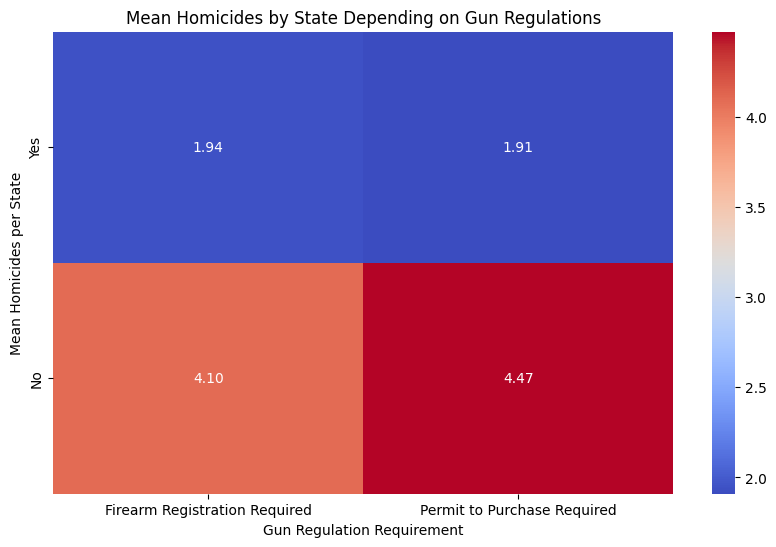

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Regulation': ['Yes', 'No'],'Firearm Registration Required': [1.94, 4.1],'Permit to Purchase Required': [1.91, 4.47]}

df_gun_regulations = pd.DataFrame(data)
df_gun_regulations.set_index('Regulation', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_gun_regulations, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Mean Homicides by State Depending on Gun Regulations')
plt.xlabel('Gun Regulation Requirement')
plt.ylabel('Mean Homicides per State')
plt.show()

In [6]:
df_gun_laws = pd.read_excel('Data\Gun_laws_ US.xlsx', sheet_name='Sheet3', header=0)
df_gun_laws.head()

,State,Total Regulations,"Murders by firearms, per 100,000"
0,Alabama,1,5.739645
1,Alaska,0,1.369863
2,Arizona,0,1.616848
3,Arkansas,0,8.305648
4,California,3,0.156290
